In [1]:
%matplotlib inline
from config_calc import *

import gv
import colorbrewer

import matplotlib as mpl
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
plt.rcParams['mathtext.default']='regular'
import shapely.geometry as sgeom
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.img_tiles as cimgt


In [14]:
def plot(lon,lat,plot_name,title=''):
    fig = plt.figure(figsize=(16,9))
   
    print 'getting tiles'    
    tiler = cimgt.StamenTerrain()
    #tiler = cimgt.MapQuestOpenAerial()
    #tiler = cimgt.GoogleTiles(style="satellite")
    #tiler = cimgt.GoogleTiles(style="terrain")

    prj = tiler.crs
    crs_latlon = ccrs.PlateCarree()
    ax = plt.axes(projection=prj)
    ax.set_extent([-95,-48,-78,-15],crs=crs_latlon)

    #--- plot tiles
    print 'tiling...'
    ax.add_image(tiler, 6)
    ax.coastlines('50m')

    print 'formatting gridlines'
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlines = False
    gl.ylines = False
    gl.xlocator = mticker.FixedLocator(np.arange(-90.,-40.,10))
    gl.ylocator = mticker.FixedLocator(np.arange(-80,-10,10))
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    #--plot flights
    print 'plotting flights'
    color = colorbrewer.qualitative8y()
    color = color + color + color
    for i,(x,y) in enumerate(zip(lon,lat)):
        ax.plot(x,y,'-',
                transform=crs_latlon,
                color=color[i],
                markersize=1,
                linewidth=1.5)

    if title:
        ax.set_title(title,loc='left')
    print 'saving fig'
    plt.savefig(plot_name,dpi=300,bbox_inches='tight')


getting tiles
tiling...
formatting gridlines
plotting flights
saving fig
getting tiles
tiling...
formatting gridlines
plotting flights
saving fig
getting tiles
tiling...
formatting gridlines
plotting flights
saving fig
getting tiles
tiling...
formatting gridlines
plotting flights
saving fig
getting tiles
tiling...
formatting gridlines
plotting flights
saving fig
getting tiles
tiling...
formatting gridlines
plotting flights
saving fig
getting tiles
tiling...
formatting gridlines
plotting flights
saving fig
getting tiles
tiling...
formatting gridlines
plotting flights
saving fig
getting tiles
tiling...
formatting gridlines
plotting flights
saving fig
getting tiles
tiling...
formatting gridlines
plotting flights
saving fig
getting tiles
tiling...
formatting gridlines
plotting flights
saving fig
getting tiles
tiling...
formatting gridlines
plotting flights
saving fig
getting tiles
tiling...
formatting gridlines
plotting flights
saving fig
getting tiles
tiling...
formatting gridlines
plotti

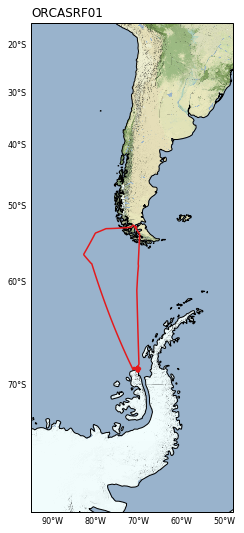

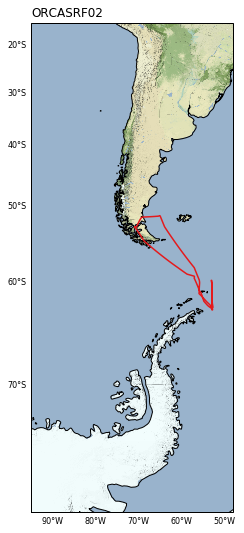

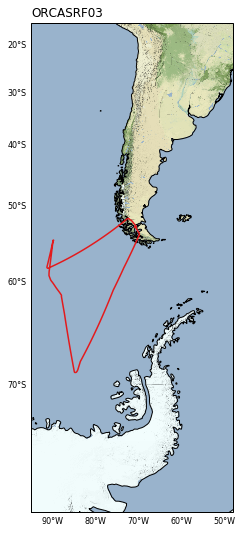

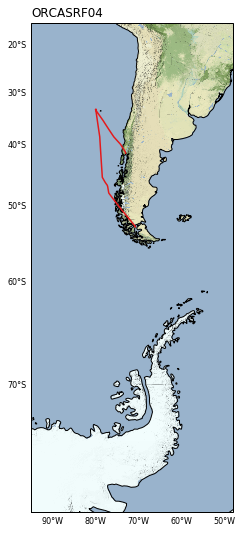

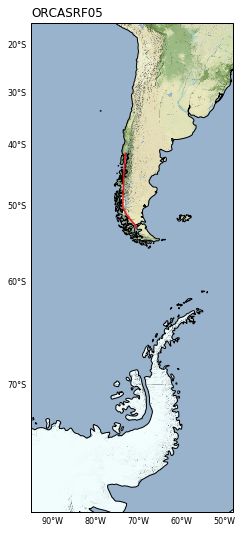

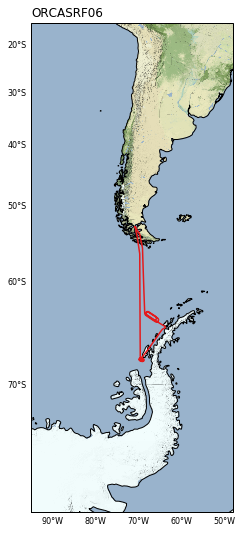

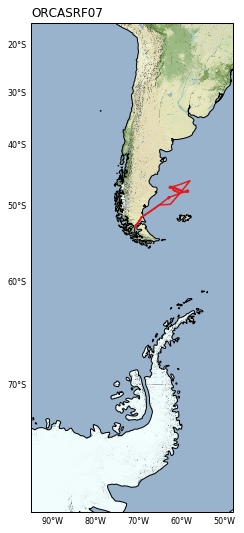

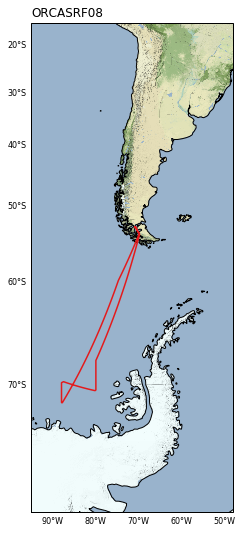

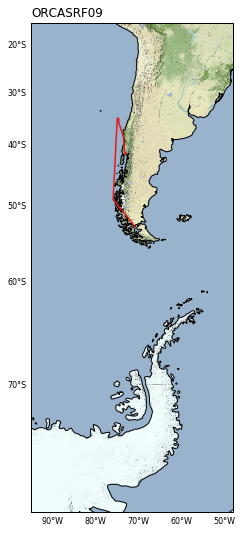

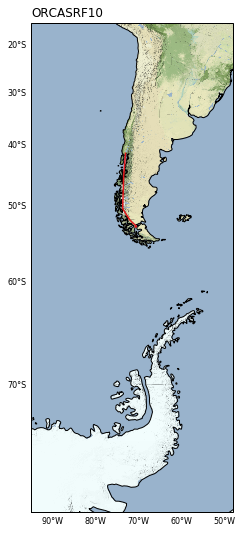

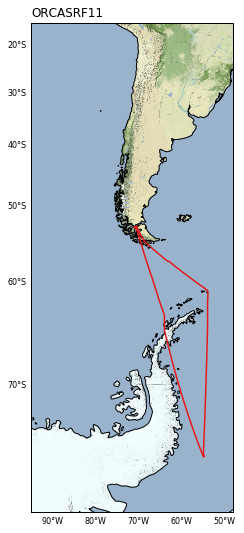

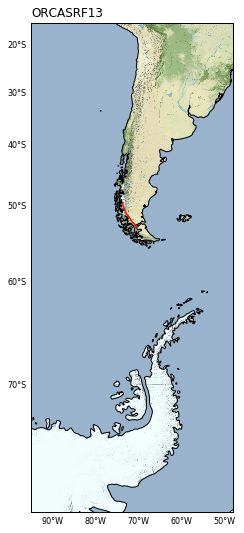

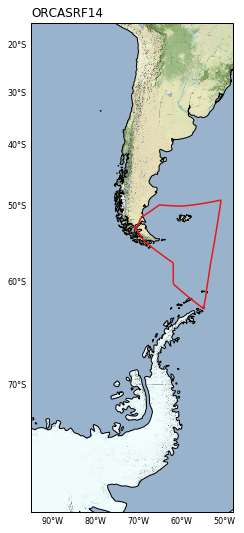

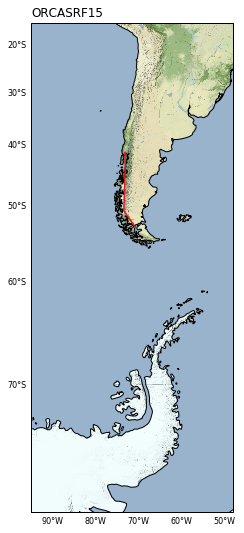

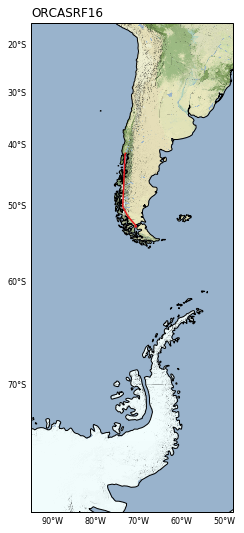

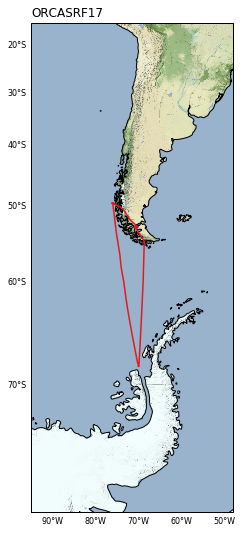

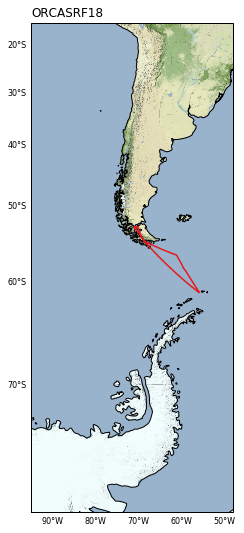

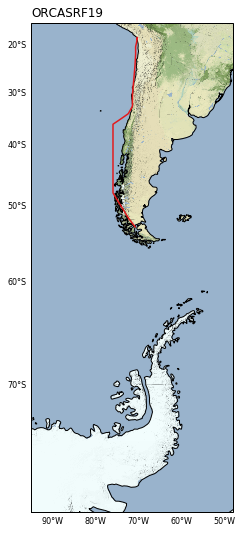

In [15]:
for name,f in zip(gv.flight,gv.flight_file):
    rf = xr.open_dataset(f)
    plot([rf.GGLON],[rf.GGLAT],title=name.upper(),
         plot_name=os.path.join(diro['fig'],'flight_map.%s.png'%name))